In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [4]:
import numpy as np
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()
X, y = breast_cancer_data.data, breast_cancer_data.target

print(breast_cancer_data.feature_names)
print(breast_cancer_data.target_names)

#Save the data into a pandas dataframe
df = pd.DataFrame(X, columns=breast_cancer_data.feature_names)
df['malignant'] = y

#Save the data into a csv file
df.to_csv('breast_cancer_data.csv', index=False)



['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [5]:
# Load the dataset
df = pd.read_csv('breast_cancer_data.csv')

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from time import time
feature_names = df.columns[:-1]
start = time()
feature_selector = SequentialFeatureSelector(
        LogisticRegression(),
        n_features_to_select="auto",
        direction="backward",
        scoring="roc_auc",
        
        n_jobs=2,
    )

model = make_pipeline(StandardScaler(), feature_selector, LogisticRegression())
model.fit(X, y)
end = time()
print(f"Time to select features: {end-start:.2f}s")
print(f"Features selected: {feature_names[model[1].get_support()]}")

Time to select features: 11.82s
Features selected: Index(['mean smoothness', 'mean compactness', 'mean concavity',
       'mean symmetry', 'radius error', 'area error', 'smoothness error',
       'symmetry error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [9]:
#save reduced dataset to a csv file
df_reduced = df[feature_names[model[1].get_support()]]
df_reduced['malignant'] = df['malignant']
df_reduced.to_csv('sbr-breast_cancer_data_reduced.csv', index=False)


C:\Users\uttam\AppData\Local\Temp\ipykernel_10968\2849557494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['malignant'] = df['malignant']


In [10]:
#split both datasets into training and testing datasets
df = pd.read_csv('breast_cancer_data.csv')
X = df.drop('malignant', axis=1)
y = df['malignant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

df_reduced = pd.read_csv('sbr-breast_cancer_data_reduced.csv')
X_reduced = df_reduced.drop('malignant', axis=1)
y_reduced = df_reduced['malignant']
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=0)


In [14]:
# Step 4: Train various classifiers on both datasets
# Random Forest
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Random Forest Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Random Forest Recall: {recall_score(y_test, y_pred):.2f}")
print(f"Random Forest F1 Score: {f1_score(y_test, y_pred):.2f}")

X_train_reduced = np.ascontiguousarray(X_train_reduced)
X_test_reduced = np.ascontiguousarray(X_test_reduced)
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=0)
rf_reduced.fit(X_train_reduced, y_train_reduced)
y_pred_reduced = rf_reduced.predict(X_test_reduced)
print(f"Random Forest Accuracy (Reduced): {accuracy_score(y_test_reduced, y_pred_reduced):.2f}")
print(f"Random Forest Precision (Reduced): {precision_score(y_test_reduced, y_pred_reduced):.2f}")
print(f"Random Forest Recall (Reduced): {recall_score(y_test_reduced, y_pred_reduced):.2f}")
print(f"Random Forest F1 Score (Reduced): {f1_score(y_test_reduced, y_pred_reduced):.2f}")

# Support Vector Machine
svc = SVC(random_state=0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"SVM Precision: {precision_score(y_test, y_pred):.2f}")
print(f"SVM Recall: {recall_score(y_test, y_pred):.2f}")
print(f"SVM F1 Score: {f1_score(y_test, y_pred):.2f}")

svc_reduced = SVC(random_state=0)
svc_reduced.fit(X_train_reduced, y_train_reduced)
y_pred_reduced = svc_reduced.predict(X_test_reduced)
print(f"SVM Accuracy (Reduced): {accuracy_score(y_test_reduced, y_pred_reduced):.2f}")
print(f"SVM Precision (Reduced): {precision_score(y_test_reduced, y_pred_reduced):.2f}")
print(f"SVM Recall (Reduced): {recall_score(y_test_reduced, y_pred_reduced):.2f}")
print(f"SVM F1 Score (Reduced): {f1_score(y_test_reduced, y_pred_reduced):.2f}")

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"KNN Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"KNN Precision: {precision_score(y_test, y_pred):.2f}")
print(f"KNN Recall: {recall_score(y_test, y_pred):.2f}")
print(f"KNN F1 Score: {f1_score(y_test, y_pred):.2f}")

knn_reduced = KNeighborsClassifier()
knn_reduced.fit(X_train_reduced, y_train_reduced)
y_pred_reduced = knn_reduced.predict(X_test_reduced)
print(f"KNN Accuracy (Reduced): {accuracy_score(y_test_reduced, y_pred_reduced):.2f}")
print(f"KNN Precision (Reduced): {precision_score(y_test_reduced, y_pred_reduced):.2f}")
print(f"KNN Recall (Reduced): {recall_score(y_test_reduced, y_pred_reduced):.2f}")
print(f"KNN F1 Score (Reduced): {f1_score(y_test_reduced, y_pred_reduced):.2f}")




Random Forest Accuracy: 0.96
Random Forest Precision: 0.98
Random Forest Recall: 0.96
Random Forest F1 Score: 0.97
Random Forest Accuracy (Reduced): 0.96
Random Forest Precision (Reduced): 0.97
Random Forest Recall (Reduced): 0.96
Random Forest F1 Score (Reduced): 0.96
SVM Accuracy: 0.93
SVM Precision: 0.90
SVM Recall: 0.99
SVM F1 Score: 0.94
SVM Accuracy (Reduced): 0.96
SVM Precision (Reduced): 0.96
SVM Recall (Reduced): 0.97
SVM F1 Score (Reduced): 0.96
KNN Accuracy: 0.94
KNN Precision: 0.95
KNN Recall: 0.94
KNN F1 Score: 0.95
KNN Accuracy (Reduced): 0.96
KNN Precision (Reduced): 0.97
KNN Recall (Reduced): 0.96
KNN F1 Score (Reduced): 0.96


In [15]:
# Save performance metrics to a csv file for both datasets to compare

performance_metrics = {
    'Model': ['Random Forest', 'Random Forest (Reduced)', 'SVM', 'SVM (Reduced)', 'KNN', 'KNN (Reduced)'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test_reduced, y_pred_reduced), accuracy_score(y_test, y_pred), accuracy_score(y_test_reduced, y_pred_reduced), accuracy_score(y_test, y_pred), accuracy_score(y_test_reduced, y_pred_reduced)],
    'Precision': [precision_score(y_test, y_pred), precision_score(y_test_reduced, y_pred_reduced), precision_score(y_test, y_pred), precision_score(y_test_reduced, y_pred_reduced), precision_score(y_test, y_pred), precision_score(y_test_reduced, y_pred_reduced)],
    'Recall': [recall_score(y_test, y_pred), recall_score(y_test_reduced, y_pred_reduced), recall_score(y_test, y_pred), recall_score(y_test_reduced, y_pred_reduced), recall_score(y_test, y_pred), recall_score(y_test_reduced, y_pred_reduced)],
    'F1 Score': [f1_score(y_test, y_pred), f1_score(y_test_reduced, y_pred_reduced), f1_score(y_test, y_pred), f1_score(y_test_reduced, y_pred_reduced), f1_score(y_test, y_pred), f1_score(y_test_reduced, y_pred_reduced)]
}

df = pd.DataFrame(performance_metrics)
df.to_csv('sbr-performance_metrics.csv', index=False)
print(df)

                     Model  Accuracy  Precision    Recall  F1 Score
0            Random Forest  0.938596   0.954545  0.940299  0.947368
1  Random Forest (Reduced)  0.956140   0.969697  0.955224  0.962406
2                      SVM  0.938596   0.954545  0.940299  0.947368
3            SVM (Reduced)  0.956140   0.969697  0.955224  0.962406
4                      KNN  0.938596   0.954545  0.940299  0.947368
5            KNN (Reduced)  0.956140   0.969697  0.955224  0.962406


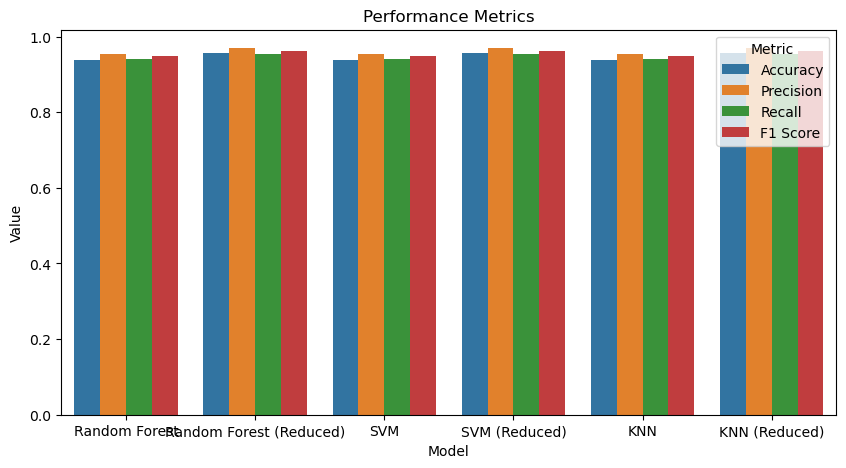

In [17]:
# Visuaisation of the performance metrics

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sbr-performance_metrics.csv')
df = df.melt(id_vars='Model', var_name='Metric', value_name='Value')
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Value', hue='Metric', data=df)
plt.title('Performance Metrics')
plt.show()